In [1]:
import os 
import sys 
sys.path.append('../lznestpy')

import nestpy
from random import choices
from nestUtils import *

import matplotlib.pyplot as plt
import numpy as np

from LXeSimulation import *



In [2]:
testEventRate = [ [0.5*i, 0.005] for i in range(200)]
np.savetxt('/Users/yxu/workbenches/XeArLoopworkbench/EventRatesMMA/testEventRate.txt', testEventRate, delimiter=',')


In [3]:
nEvents = 1000000
g1 = 0.114
g2 = 47.1


def simulate_LXe_NEST(EventRateFile, nEvents, g1, g2):
    trueEventRate = np.loadtxt(EventRateFile, skiprows=0,delimiter=',')
    if trueEventRate.shape[0] >= 1500:
        trueEventRate = trueEventRate[:1000,:]
    reco_energies, S1s, spikes, S2s, weights = simulate_LXe(EventRateFile, nEvents, g1, g2)
    cutMask = (S1s >= 3) & (S1s <= 80) & (spikes >= 3)
    return reco_energies[cutMask], weights[cutMask], S1s[cutMask], S2s[cutMask]


In [4]:
EventRateFile = "/Users/yxu/workbenches/XeArLoopworkbench/EventRatesMMA/Xenon/Xe50zlTable.csv"
reco_energies, weights, S1s, S2s = simulate_LXe_NEST(EventRateFile, nEvents, g1, g2)

In [5]:
LZ_SR1_filePath = "/Users/yxu/workbenches/XeArLoopworkbench/LZ_SR1_data.txt"
LZ_SR1_file = np.loadtxt(LZ_SR1_filePath, skiprows=1,delimiter=' ')
S1c_LZ, S2c_LZ = LZ_SR1_file[:,0], 10.0**LZ_SR1_file[:,1]


In [6]:
TestEventRateFile = "/Users/yxu/workbenches/XeArLoopworkbench/EventRatesMMA/testEventRate.txt"
reco_energies_Test, weights_Test, S1s_Test, S2s_Test = simulate_LXe_NEST(TestEventRateFile, nEvents, g1, g2)


Text(0, 0.5, 'S2c [phd]')

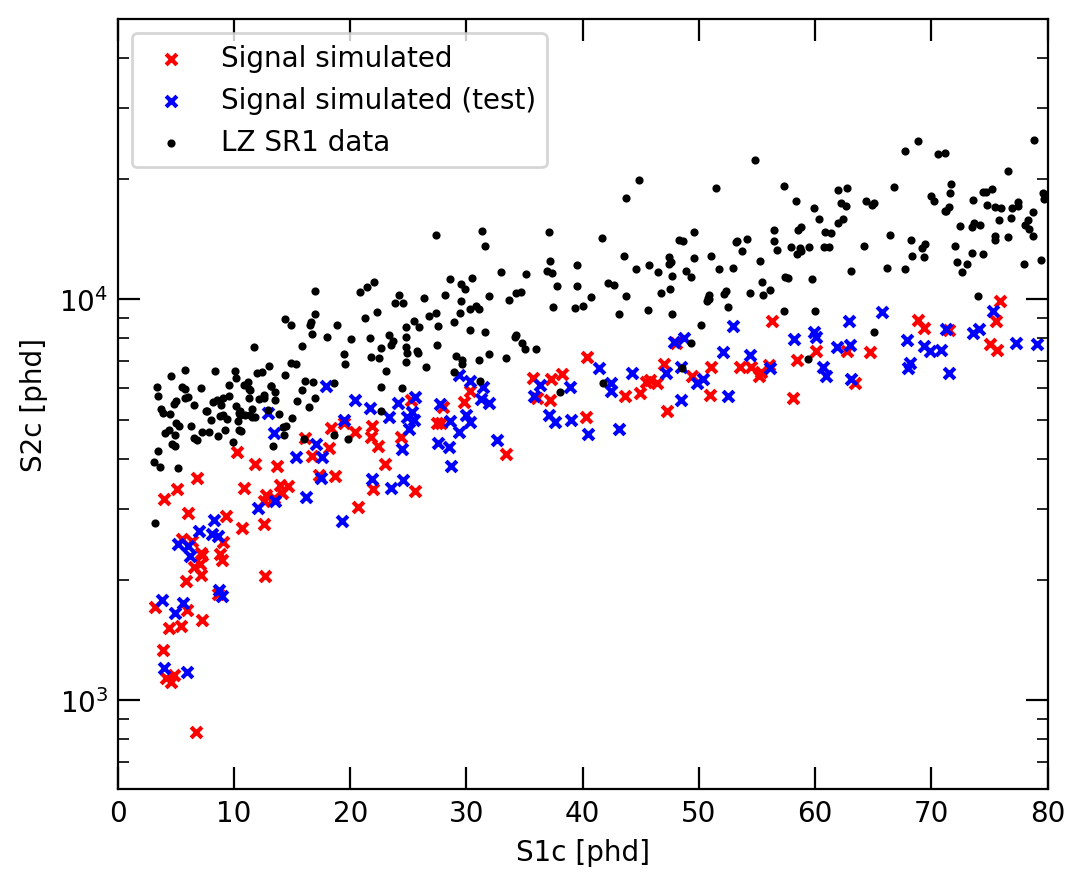

In [7]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=200)
ax.scatter(S1s[:100], S2s[:100], s=15, alpha=1, marker='x', color='red', label='Signal simulated')
ax.scatter(S1s_Test[:100], S2s_Test[:100], s=15, alpha=1, marker='x', color='blue', label='Signal simulated (test)')
ax.scatter(S1c_LZ[:], S2c_LZ[:], s=15, alpha=1, marker='.', color='black', label='LZ SR1 data')
ax.set_yscale('log')
ax.tick_params(axis='y', direction='in', length=8, right=True, )
ax.tick_params(axis='y', which='minor', direction='in', length=4, right=True)
ax.tick_params(axis='x', direction='in', length=8, top=True)
ax.tick_params(axis='x', which='minor', direction='in', length=4, top=True)

ax.set_xlim(0, 80)
ax.set_ylim(600, 5E4)

ax.legend()

ax.set_xlabel('S1c [phd]')
ax.set_ylabel('S2c [phd]')


In [8]:
eventRateXe50p1File = "/Users/yxu/workbenches/XeArLoopworkbench/EventRatesMMA/Xenon/Xe50p1Table.csv"
eventRateXe50p2File = "/Users/yxu/workbenches/XeArLoopworkbench/EventRatesMMA/Xenon/Xe50p2Table.csv"
eventRateXe50pFile = "/Users/yxu/workbenches/XeArLoopworkbench/EventRatesMMA/Xenon/Xe50pTable.csv"

eventRateXe50p1 = np.loadtxt(eventRateXe50p1File, skiprows=0,delimiter=',')
eventRateXe50p2 = np.loadtxt(eventRateXe50p2File, skiprows=0,delimiter=',')
eventRateXe50p = np.loadtxt(eventRateXe50pFile, skiprows=0,delimiter=',')

# fig, ax = plt.subplots(figsize=(6, 5))
# ax.plot(eventRateXe50p1[:,0], eventRateXe50p1[:,1], label='Xe50p1')
# ax.plot(eventRateXe50p2[:,0], eventRateXe50p2[:,1], label='Xe50p2')
# ax.plot(eventRateXe50p[:,0], eventRateXe50p[:,1], label='Xe50p')
# ax.legend()
energy_xenon50p1, weights_xenon50p1, S1s_xenon50p1, S2s_xenon50p1 = simulate_LXe_NEST(eventRateXe50p1File, nEvents, g1, g2)
energy_xenon50p2, weights_xenon50p2, S1s_xenon50p2, S2s_xenon50p2 = simulate_LXe_NEST(eventRateXe50p2File, nEvents, g1, g2)
energy_xenon50p, weights_xenon50p, S1s_xenon50p, S2s_xenon50p = simulate_LXe_NEST(eventRateXe50pFile, nEvents, g1, g2)



In [9]:
eventRateXe50p1lFile = "/Users/yxu/workbenches/XeArLoopworkbench/EventRatesMMA/Xenon/Xe50p1lTable.csv"
eventRateXe50p2lFile = "/Users/yxu/workbenches/XeArLoopworkbench/EventRatesMMA/Xenon/Xe50p2lTable.csv"
eventRateXe50plFile = "/Users/yxu/workbenches/XeArLoopworkbench/EventRatesMMA/Xenon/Xe50plTable.csv"

eventRateXe50p1l = np.loadtxt(eventRateXe50p1lFile, skiprows=0,delimiter=',')
eventRateXe50p2l = np.loadtxt(eventRateXe50p2lFile, skiprows=0,delimiter=',')
eventRateXe50pl = np.loadtxt(eventRateXe50plFile, skiprows=0,delimiter=',')

energy_xenon50p1l, weights_xenon50p1l, S1s_xenon50p1l, S2s_xenon50p1l = simulate_LXe_NEST(eventRateXe50p1lFile, nEvents, g1, g2)
energy_xenon50p2l, weights_xenon50p2l, S1s_xenon50p2l, S2s_xenon50p2l = simulate_LXe_NEST(eventRateXe50p2lFile, nEvents, g1, g2)
energy_xenon50pl, weights_xenon50pl, S1s_xenon50pl, S2s_xenon50pl = simulate_LXe_NEST(eventRateXe50plFile, nEvents, g1, g2)


In [10]:
eventRateXe50z1File = "/Users/yxu/workbenches/XeArLoopworkbench/EventRatesMMA/Xenon/Xe50zlTable.csv"
eventRateXe50z2File = "/Users/yxu/workbenches/XeArLoopworkbench/EventRatesMMA/Xenon/Xe50z2Table.csv"
eventRateXe50zFile = "/Users/yxu/workbenches/XeArLoopworkbench/EventRatesMMA/Xenon/Xe50zTable.csv"

eventRateXe50z1 = np.loadtxt(eventRateXe50z1File, skiprows=0,delimiter=',')
eventRateXe50z2 = np.loadtxt(eventRateXe50z2File, skiprows=0,delimiter=',')
eventRateXe50z = np.loadtxt(eventRateXe50zFile, skiprows=0,delimiter=',')

energy_xenon50z1, weights_xenon50z1, S1s_xenon50z1, S2s_xenon50z1 = simulate_LXe_NEST(eventRateXe50z1File, nEvents, g1, g2)
energy_xenon50z2, weights_xenon50z2, S1s_xenon50z2, S2s_xenon50z2 = simulate_LXe_NEST(eventRateXe50z2File, nEvents, g1, g2)
energy_xenon50z, weights_xenon50z, S1s_xenon50z, S2s_xenon50z = simulate_LXe_NEST(eventRateXe50zFile, nEvents, g1, g2)


In [11]:
eventRateXe50z1lFile = "/Users/yxu/workbenches/XeArLoopworkbench/EventRatesMMA/Xenon/Xe50z1lTable.csv"
eventRateXe50z2lFile = "/Users/yxu/workbenches/XeArLoopworkbench/EventRatesMMA/Xenon/Xe50z2lTable.csv"
eventRateXe50zlFile = "/Users/yxu/workbenches/XeArLoopworkbench/EventRatesMMA/Xenon/Xe50zlTable.csv"

eventRateXe50z1l = np.loadtxt(eventRateXe50z1lFile, skiprows=0,delimiter=',')
eventRateXe50z2l = np.loadtxt(eventRateXe50z2lFile, skiprows=0,delimiter=',')
eventRateXe50zl = np.loadtxt(eventRateXe50zlFile, skiprows=0,delimiter=',')

energy_xenon50z1l, weights_xenon50z1l, S1s_xenon50z1l, S2s_xenon50z1l = simulate_LXe_NEST(eventRateXe50z1lFile, nEvents, g1, g2)
energy_xenon50z2l, weights_xenon50z2l, S1s_xenon50z2l, S2s_xenon50z2l = simulate_LXe_NEST(eventRateXe50z2lFile, nEvents, g1, g2)
energy_xenon50zl, weights_xenon50zl, S1s_xenon50zl, S2s_xenon50zl = simulate_LXe_NEST(eventRateXe50zlFile, nEvents, g1, g2)


In [13]:
%%capture
eventRateXe200pFile = "/Users/yxu/workbenches/XeArLoopworkbench/EventRatesMMA/Xenon/Xe200pTable.csv"
eventRateXe200plFile = "/Users/yxu/workbenches/XeArLoopworkbench/EventRatesMMA/Xenon/Xe200plTable.csv"

eventRateXe200zFile = "/Users/yxu/workbenches/XeArLoopworkbench/EventRatesMMA/Xenon/Xe200zTable.csv"
eventRateXe200zlFile = "/Users/yxu/workbenches/XeArLoopworkbench/EventRatesMMA/Xenon/Xe200zlTable.csv"

energy_xenon200p, weights_xenon200p, S1s_xenon200p, S2s_xenon200p = simulate_LXe_NEST(eventRateXe200pFile, nEvents, g1, g2)
energy_xenon200pl, weights_xenon200pl, S1s_xenon200pl, S2s_xenon200pl = simulate_LXe_NEST(eventRateXe200plFile, nEvents, g1, g2)    

energy_xenon200z, weights_xenon200z, S1s_xenon200z, S2s_xenon200z = simulate_LXe_NEST(eventRateXe200zFile, nEvents, g1, g2)
energy_xenon200zl, weights_xenon200zl, S1s_xenon200zl, S2s_xenon200zl = simulate_LXe_NEST(eventRateXe200zlFile, nEvents, g1, g2)


0.00630420997909769


Text(0.5, 1.0, '1-Loop DM-Xenon spin-dependent coupling')

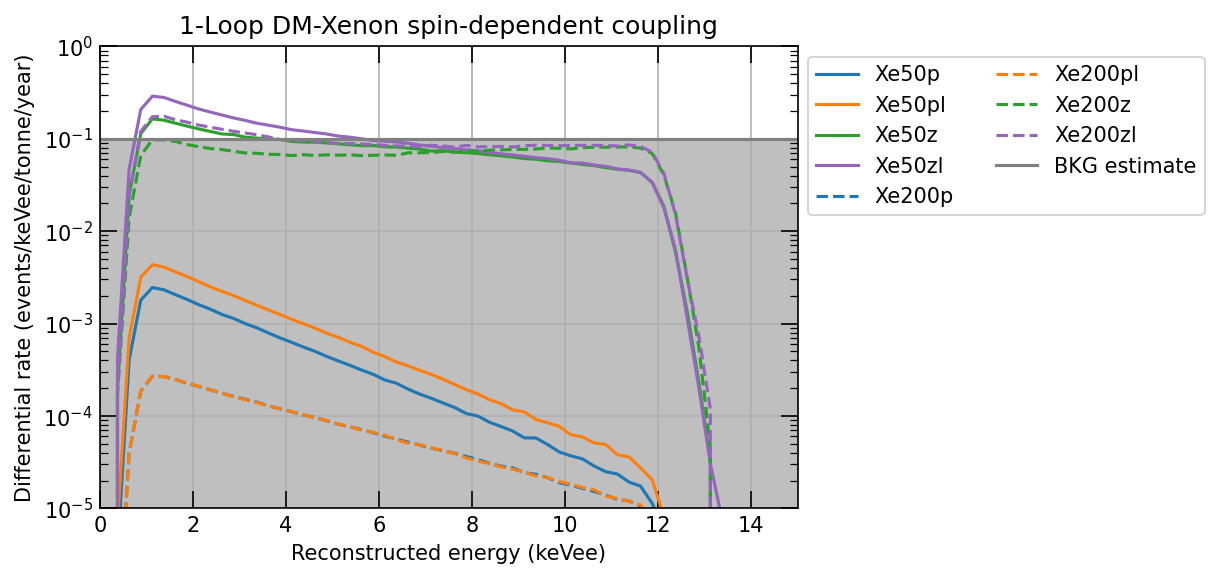

In [14]:
fig, ax = plt.subplots(figsize=(6, 4),dpi=150)

bins = np.linspace(0,25,101,endpoint=True)
bin_centers = (bins[:-1] + bins[1:])/2

hist_values_xenon50p, _ = np.histogram(energy_xenon50p, bins=bins, weights=4*0.9*weights_xenon50p)
hist_values_xenon50p1, _ = np.histogram(energy_xenon50p1, bins=bins, weights=4*0.9*weights_xenon50p1)
hist_values_xenon50p2, _ = np.histogram(energy_xenon50p2, bins=bins, weights=4*0.9*weights_xenon50p2)

hist_values_xenon50p1l, _ = np.histogram(energy_xenon50p1l, bins=bins, weights=4*0.9*weights_xenon50p1l)
hist_values_xenon50p2l, _ = np.histogram(energy_xenon50p2l, bins=bins, weights=4*0.9*weights_xenon50p2l)
hist_values_xenon50pl, _ = np.histogram(energy_xenon50pl, bins=bins, weights=4*0.9*weights_xenon50pl)

hist_values_xenon50z1, _ = np.histogram(energy_xenon50z1, bins=bins, weights=4*0.9*weights_xenon50z1)
hist_values_xenon50z2, _ = np.histogram(energy_xenon50z2, bins=bins, weights=4*0.9*weights_xenon50z2)
hist_values_xenon50z, _ = np.histogram(energy_xenon50z, bins=bins, weights=4*0.9*weights_xenon50z)

hist_values_xenon50z1l, _ = np.histogram(energy_xenon50z1l, bins=bins, weights=4*0.9*weights_xenon50z1l)
hist_values_xenon50z2l, _ = np.histogram(energy_xenon50z2l, bins=bins, weights=4*0.9*weights_xenon50z2l)
hist_values_xenon50zl, _ = np.histogram(energy_xenon50zl, bins=bins, weights=4*0.9*weights_xenon50zl)

hist_values_xenon200p, _ = np.histogram(energy_xenon200p, bins=bins, weights=4*0.9*weights_xenon200p)
hist_values_xenon200pl, _ = np.histogram(energy_xenon200pl, bins=bins, weights=4*0.9*weights_xenon200pl)
hist_values_xenon200z, _ = np.histogram(energy_xenon200z, bins=bins, weights=4*0.9*weights_xenon200z)
hist_values_xenon200zl, _ = np.histogram(energy_xenon200zl, bins=bins, weights=4*0.9*weights_xenon200zl)

# 4 = 1/0.25 is the contribution from width of the energy bin
# ax.plot(bin_centers, hist_values_xenon50p1, '-', label='Xe50p1')
# ax.plot(bin_centers, hist_values_xenon50p2, '-', label='Xe50p2')
ax.plot(bin_centers, hist_values_xenon50p, '-', label='Xe50p', color='tab:blue')
# ax.plot(bin_centers, hist_values_xenon50p1l, '-', label='Xe50p1l')
# ax.plot(bin_centers, hist_values_xenon50p2l, '-', label='Xe50p2l')
ax.plot(bin_centers, hist_values_xenon50pl, '-', label='Xe50pl', color='tab:orange')

# ax.plot(bin_centers, hist_values_xenon50z1, '-', label='Xe50z1')
# ax.plot(bin_centers, hist_values_xenon50z2, '-', label='Xe50z2')
ax.plot(bin_centers, hist_values_xenon50z, '-', label='Xe50z', color='tab:green')
# ax.plot(bin_centers, hist_values_xenon50z1l, '-', label='Xe50z1l')
# ax.plot(bin_centers, hist_values_xenon50z2l, '-', label='Xe50z2l')
ax.plot(bin_centers, hist_values_xenon50zl, '-', label='Xe50zl', color='tab:purple')

ax.plot(bin_centers, hist_values_xenon200p, '--', label='Xe200p', color='tab:blue')
ax.plot(bin_centers, hist_values_xenon200pl, '--', label='Xe200pl', color='tab:orange')
ax.plot(bin_centers, hist_values_xenon200z, '--', label='Xe200z', color='tab:green')
ax.plot(bin_centers, hist_values_xenon200zl, '--', label='Xe200zl', color='tab:purple')

print(np.trapz(hist_values_xenon50p, bin_centers))
# ax.plot(trueEventRate[:,0]*0.21, trueEventRate[:,1]/0.21, label='trueEventRate')
ax.set_xlabel('Reconstructed energy (keVee)')
ax.set_ylabel('Differential rate (events/keVee/tonne/year)')
ax.plot([0,100],[0.1,0.1], label='BKG estimate', color='gray')
ax.fill_between([0,100],[0.1,0.1],[0,0], color='gray', alpha=0.5)
ax.set_xlim(0,15)
ax.tick_params(axis='y', direction='in', length=8, right=True, )
ax.tick_params(axis='y', which='minor', direction='in', length=4, right=True)
ax.tick_params(axis='x', direction='in', length=8, top=True)
ax.tick_params(axis='x', which='minor', direction='in', length=4, top=True)

ax.set_yscale('log')
ax.set_ylim(1E-5, 1)

ax.legend(ncol=2, loc='upper left', bbox_to_anchor=(1, 1))

ax.grid(True)

ax.set_title('1-Loop DM-Xenon spin-dependent coupling')



In [18]:
# Calculate signal significance using S/sqrt(S+B)
totalSignal_xe50p = np.trapz(hist_values_xenon50p[3:48], bin_centers[3:48])
totalSignal_xe50pl = np.trapz(hist_values_xenon50pl[3:48], bin_centers[3:48])
totalSignal_xe50z = np.trapz(hist_values_xenon50z[3:48], bin_centers[3:48])
totalSignal_xe50zl = np.trapz(hist_values_xenon50zl[3:48], bin_centers[3:48])

totalSignal_xe200p = np.trapz(hist_values_xenon200p[3:48], bin_centers[3:48])
totalSignal_xe200pl = np.trapz(hist_values_xenon200pl[3:48], bin_centers[3:48])
totalSignal_xe200z = np.trapz(hist_values_xenon200z[3:48], bin_centers[3:48])
totalSignal_xe200zl = np.trapz(hist_values_xenon200zl[3:48], bin_centers[3:48])

print(totalSignal_xe50p, totalSignal_xe50pl, totalSignal_xe50z, totalSignal_xe50zl)
print(totalSignal_xe200p, totalSignal_xe200pl, totalSignal_xe200z, totalSignal_xe200zl)

bkg_ref = 11*0.05 # 0.55 tonne/year

LZexposure = 0.9 # tonne/year

def significance(signalRate, bkgRate, exposure):
    return signalRate * exposure / np.sqrt(bkgRate*exposure)

print("50 GeV PS-PS No Higgs", significance(totalSignal_xe50p, bkg_ref, LZexposure))
print("50 GeV PS-PS Higgs", significance(totalSignal_xe50pl, bkg_ref, LZexposure))
print("50 GeV S-PS No Higgs", significance(totalSignal_xe50z, bkg_ref, LZexposure))
print("50 GeV S-PS Higgs", significance(totalSignal_xe50zl, bkg_ref, LZexposure))
print("200 GeV PS-PS No Higgs", significance(totalSignal_xe200p, bkg_ref, LZexposure))
print("200 GeV PS-PS Higgs", significance(totalSignal_xe200pl, bkg_ref, LZexposure))
print("200 GeV S-PS No Higgs", significance(totalSignal_xe200z, bkg_ref, LZexposure))
print("200 GeV S-PS Higgs", significance(totalSignal_xe200zl, bkg_ref, LZexposure))




0.005975639058601191 0.010574778700935988 0.9301475038673526 1.2356154499485412
0.000941922279154373 0.0009416596194625692 0.8246084885124614 1.0898823728598797
50 GeV PS-PS No Higgs 0.007644063167858037
50 GeV PS-PS Higgs 0.013527302366049624
50 GeV S-PS No Higgs 1.1898486848454148
50 GeV S-PS Higgs 1.5806045944145333
200 GeV PS-PS No Higgs 0.0012049110280021296
200 GeV PS-PS Higgs 0.0012045750325954277
200 GeV S-PS No Higgs 1.0548427227826436
200 GeV S-PS Higgs 1.394182215822473
